## Introduction
This notebook is for testing the readability of the result dataset. Run this after generating the data using the example script `mpi_test.py`

In [21]:
import zarr

dataset_path = './example_data/dataset.zarr'

# Open the dataset in read mode
root = zarr.open_group(dataset_path, mode='r')

# Access the arrays
X_flux = root["X_flux_coeffs"]
X_wts  = root["X_weights"]
Y_flux = root["Y_flux_coeffs"]
Y_pow  = root["Y_power_coeffs"]
Y_keff  = root["Y_keff"]
Y_wts = root["Y_weights"]

# Print dataset shapes
print("X_flux shape:", X_flux.shape)
print("X_weights shape:", X_wts.shape)
print("Y_flux shape:", Y_flux.shape)
print("Y_power shape:", Y_pow.shape)
print("Y_keff shape:", Y_keff.shape)
print("Y_wts shape:", Y_wts.shape)

X_flux shape: (20, 4, 5, 5, 8, 1)
X_weights shape: (20, 4)
Y_flux shape: (20, 4, 5, 5, 8, 1)
Y_power shape: (20, 15)
Y_keff shape: (20,)
Y_wts shape: (20, 4)


In [22]:
print(Y_keff[:])

[0.8204 0.8089 0.807  0.739  0.7346 1.1442 1.0999 1.1137 1.1029 1.1376
 1.0949 1.1227 1.1183 1.1123 1.1299 1.1254 1.1193 1.1109 1.1026 1.0985]


In [23]:
print(Y_wts[:])

[[0.25391051 0.33830484 0.20289196 0.20489269]
 [0.28944132 0.27037948 0.18982783 0.25035137]
 [0.27623318 0.30762332 0.21704036 0.19910314]
 [0.33303249 0.23231047 0.22093863 0.21371841]
 [0.33855574 0.23104628 0.22474338 0.2056546 ]
 [0.26525083 0.27774865 0.21185107 0.24514945]
 [0.31793799 0.23174834 0.23647604 0.21383762]
 [0.24773278 0.30914968 0.25868726 0.18443028]
 [0.27182881 0.30510472 0.19203917 0.23102729]
 [0.25061533 0.29245781 0.18415963 0.27276723]
 [0.23582062 0.32423052 0.21782811 0.22212074]
 [0.34229981 0.22864523 0.21786764 0.21118732]
 [0.26915854 0.29804167 0.18501297 0.24778682]
 [0.27879169 0.29659265 0.22296143 0.20165423]
 [0.25683689 0.27958226 0.20630144 0.25727941]
 [0.23413897 0.27065932 0.20721521 0.28798649]
 [0.25122845 0.29402305 0.26320021 0.19154829]
 [0.30902872 0.20730939 0.22576289 0.257899  ]
 [0.25648467 0.28741157 0.21295121 0.24315255]
 [0.25097861 0.24023669 0.22020938 0.28857533]]


Plot an example incident/outgoing flux, pin power example

Text(0, 0.5, 'Flux')

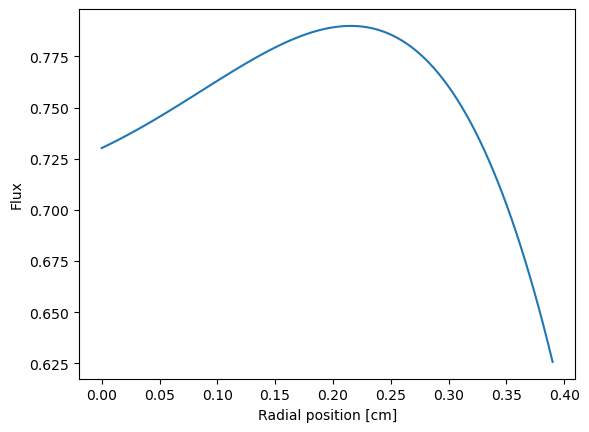

In [24]:
from pincell_moment_utils.datagen import DefaultPincellParameters
import openmc
import matplotlib.pyplot as plt
import numpy as np

sample = 7
params = DefaultPincellParameters()
radius = params.fuel_or

# First plot radial pincell flux profile
zz = openmc.Zernike(Y_pow[sample], radius)
rr = np.linspace(0, radius, 100)
plt.plot(rr, zz(rr, 0.0)) 
plt.xlabel('Radial position [cm]')
plt.ylabel('Flux')

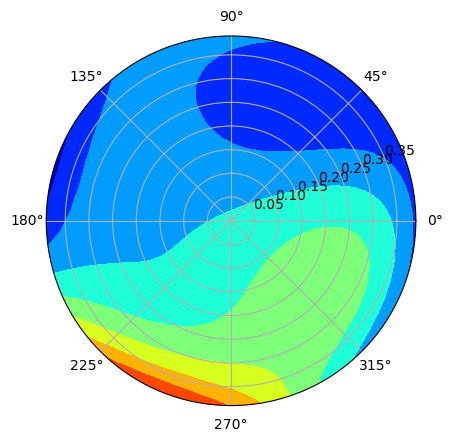

In [25]:
# Now do a polar plot
zz = openmc.Zernike(Y_pow[sample], radius=radius) 
#
# Using linspace so that the endpoint of 360 is included...
azimuths = np.radians(np.linspace(0, 360, 50))
zeniths = np.linspace(0, radius, 100)
r, theta = np.meshgrid(zeniths, azimuths)
values = zz(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values, cmap='jet')
plt.show()

These profiles admittedly look very strange, but perhaps this is to be expected from randomly generated surface expansion profiles

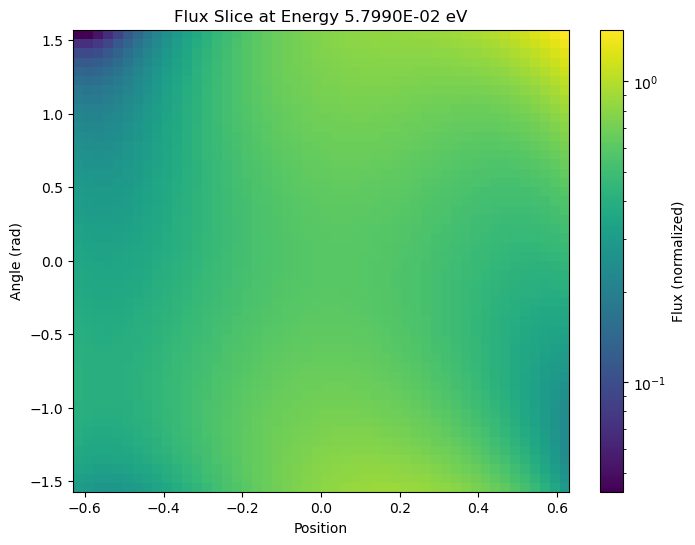

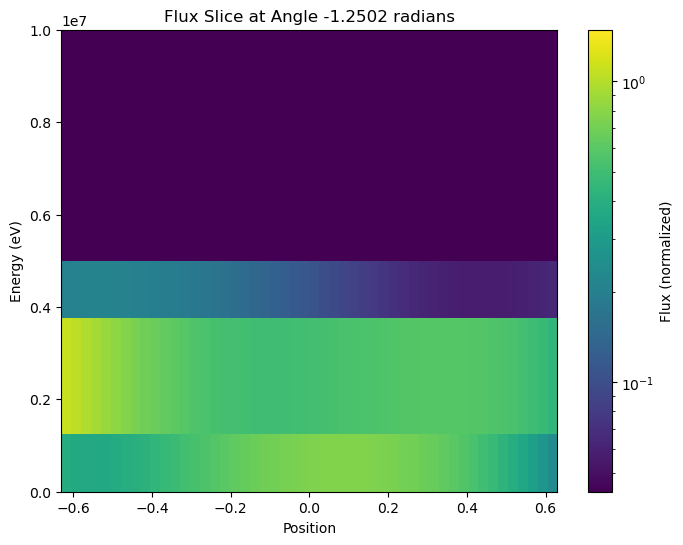

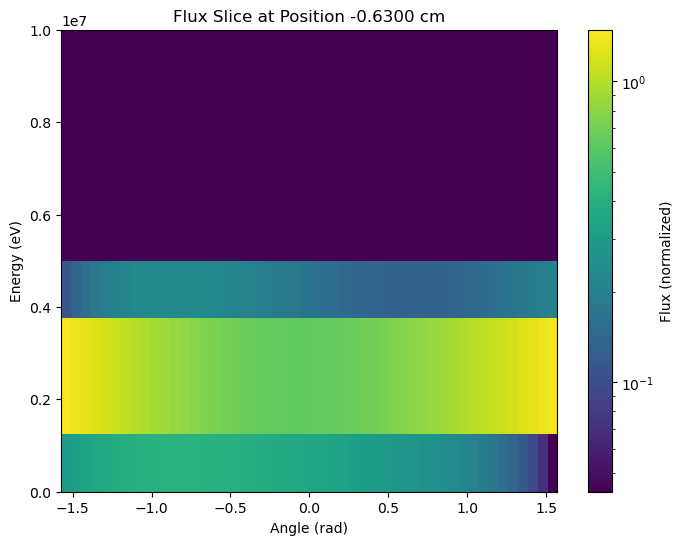

In [26]:
import pincell_moment_utils.postprocessing as pp
from pincell_moment_utils.plotting import plot_expansion

incident_flux = pp.surface_expansion(X_flux[sample], params.energy_filters, incident=True)
outgoing_flux = pp.surface_expansion(Y_flux[sample], params.energy_filters, incident=False)


plot_expansion(incident_flux, 0, 5, 0, 1, 50, 50, incident=True)

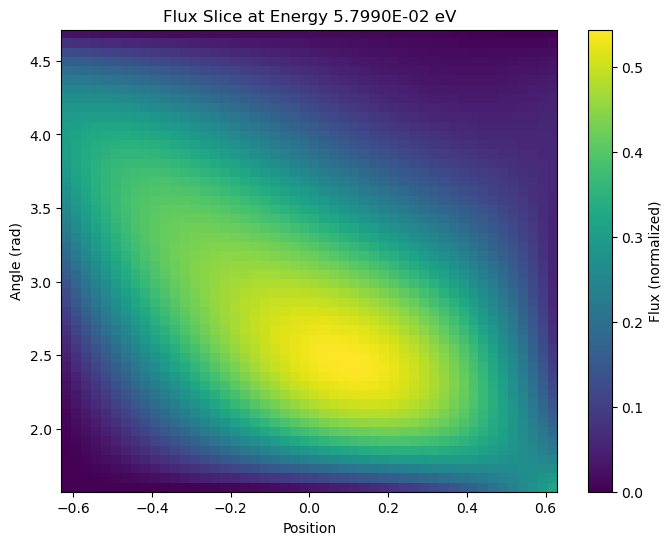

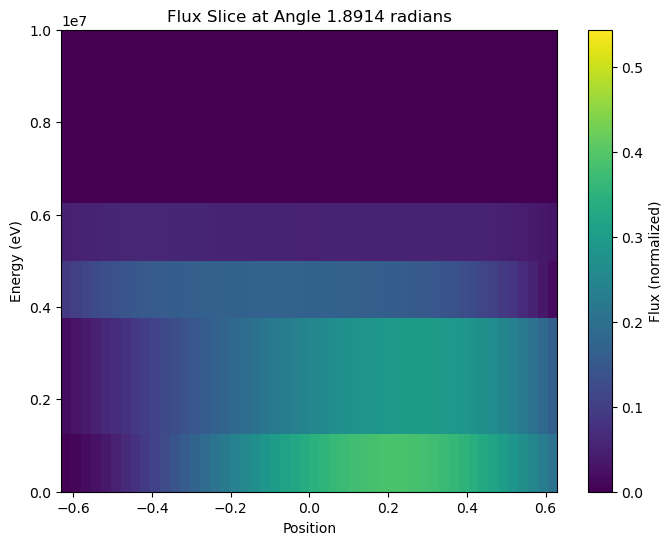

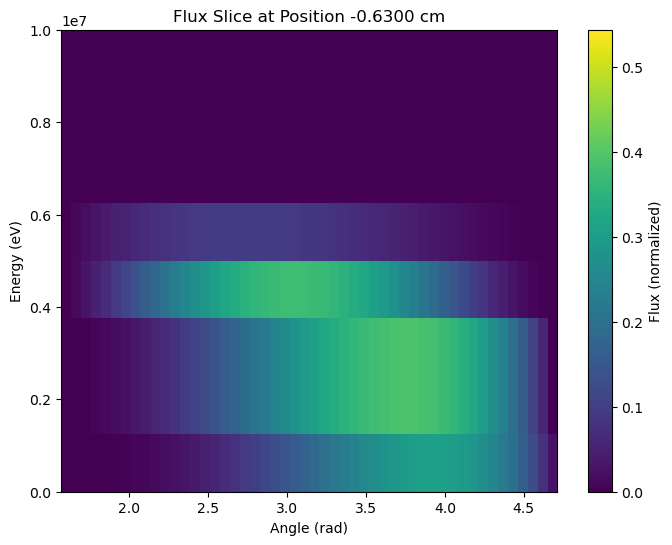

In [27]:
plot_expansion(outgoing_flux, 0, 5, 0, 1, 50, 50, incident=False)

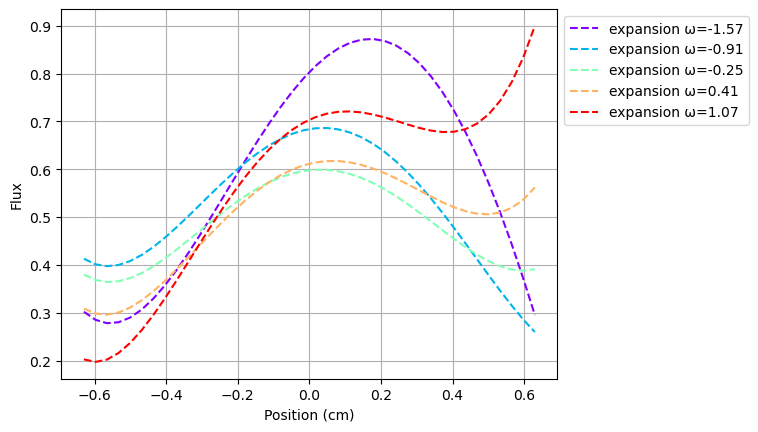

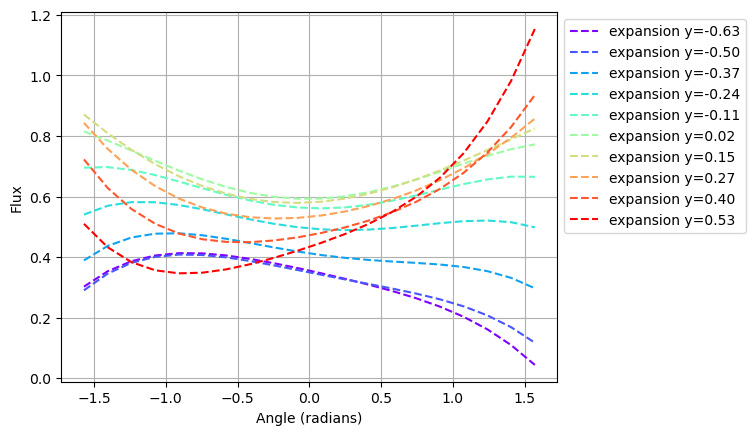

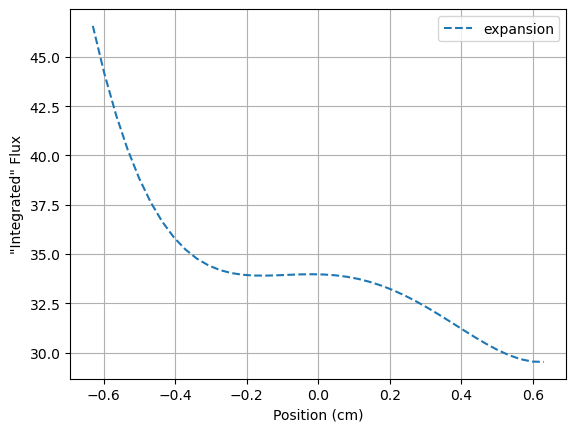

In [28]:
from pincell_moment_utils.plotting import plot_expansion_slice

plot_expansion_slice(incident_flux, 0, 1, incident=True)

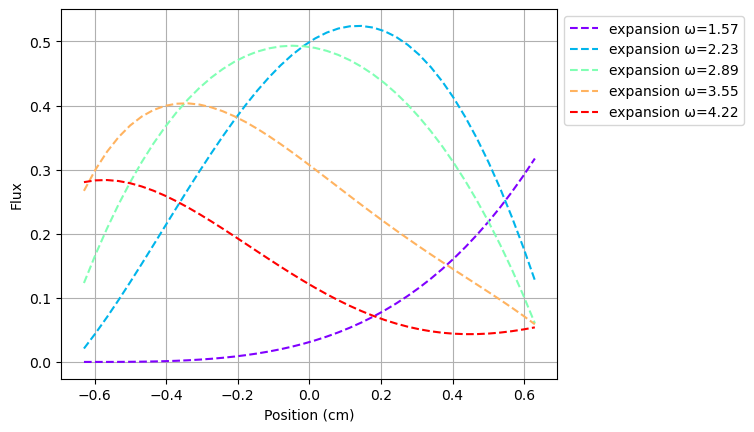

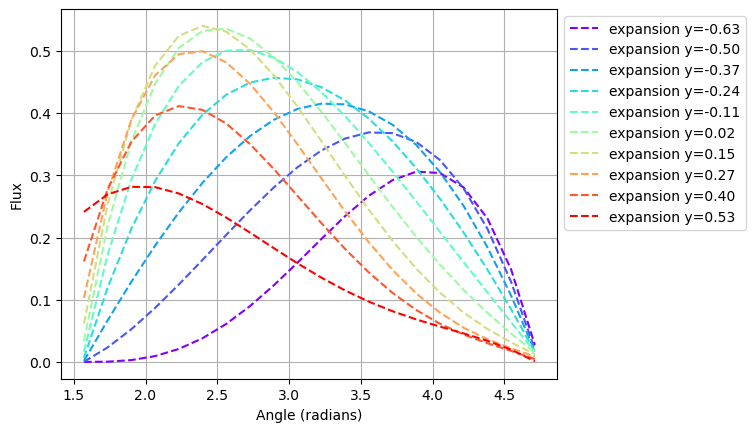

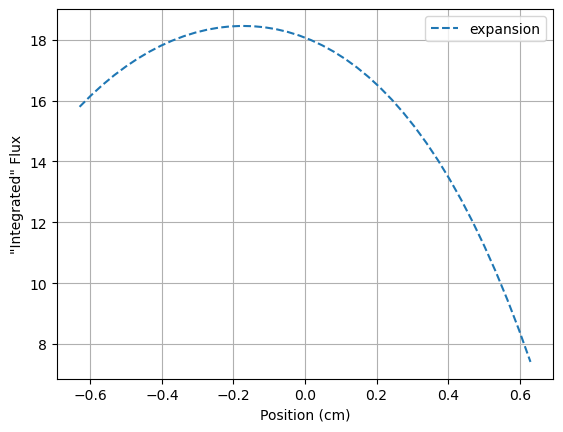

In [29]:
plot_expansion_slice(outgoing_flux, 0, 1, incident=False)

In [30]:
Y_wts[sample], X_wts[sample]

(array([0.24773278, 0.30914968, 0.25868726, 0.18443028]),
 array([0.125, 0.125, 0.125, 0.625]))